<a href="https://colab.research.google.com/github/rams30/Computer-Vision/blob/main/CV_lab03_e22cseu0557.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

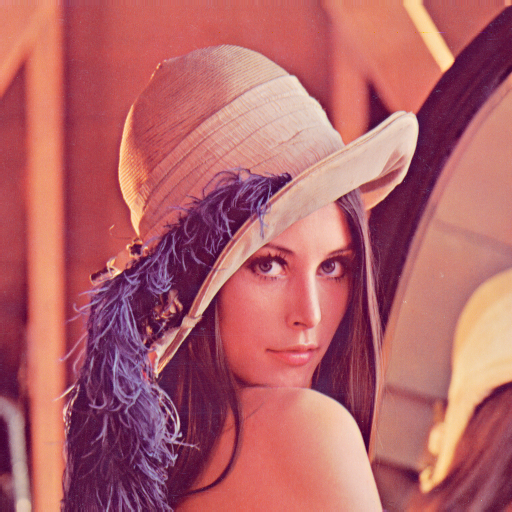

Image Size: Width=512, Height=512, Channels=3
Total number of pixels: 262144


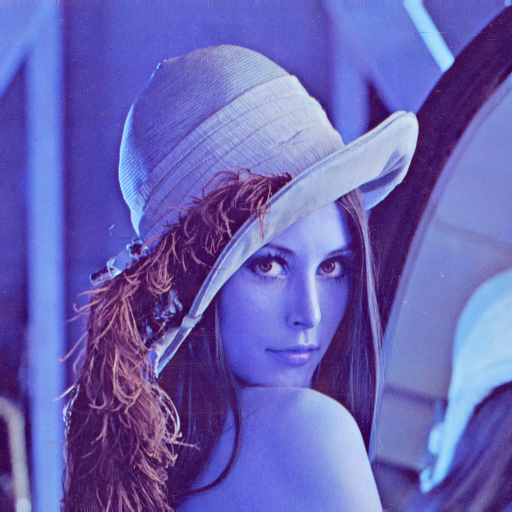

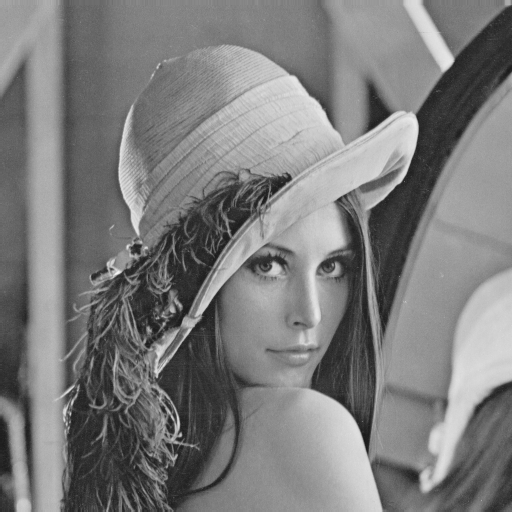

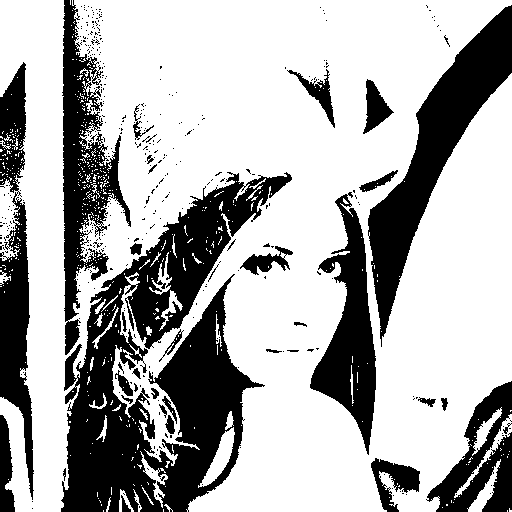

Number of Black Pixels: 82973


In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Define the image path
image_path = "/content/drive/MyDrive/Lena_Image.png"

# 1. Read the image
img = cv2.imread(image_path)

# 2. Display the image
cv2_imshow(img)

# 3. Extract Image Size
height, width, channels = img.shape
print(f"Image Size: Width={width}, Height={height}, Channels={channels}")

# 4. Calculate Image Pixels
total_pixels = height * width
print(f"Total number of pixels: {total_pixels}")

# 5. Convert BGR to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite('/content/Lena_RGB.png', img_rgb)
cv2_imshow(img_rgb)

# 6. Convert RGB to Grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
cv2.imwrite('/content/Lena_Gray.png', img_gray)
cv2_imshow(img_gray)

# 7. Convert Grayscale to Binary using a threshold
threshold_value = 100
_, img_binary = cv2.threshold(img_gray, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imwrite('/content/Lena_Binary.png', img_binary)
cv2_imshow(img_binary)

# 8. Count Black Pixels in the Binary Image
black_pixels = np.sum(img_binary == 0)
print(f"Number of Black Pixels: {black_pixels}")


Original Image:


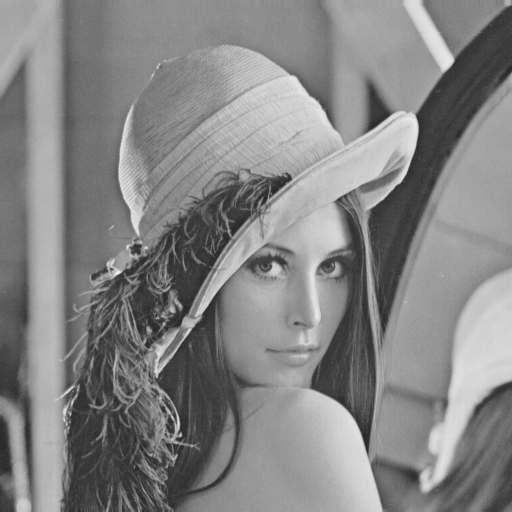

Sobel Edge Detection:


/usr/local/lib/python3.11/dist-packages/google/colab/patches/__init__.py:18: RuntimeWarning: invalid value encountered in cast
  a = a.clip(0, 255).astype('uint8')


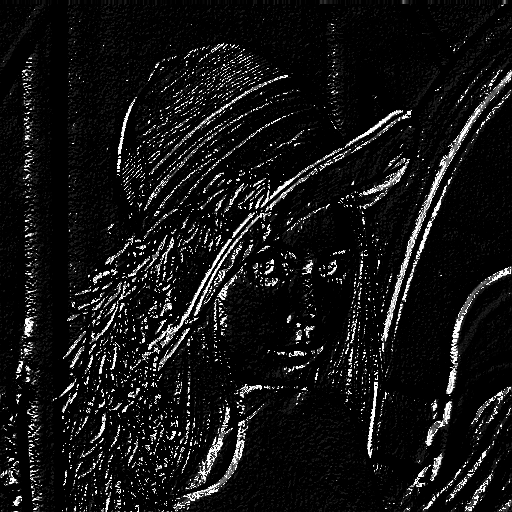

Prewitt Edge Detection:


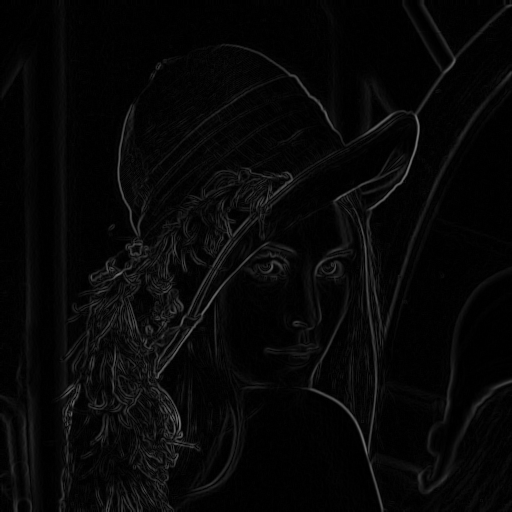

Roberts Cross Edge Detection:


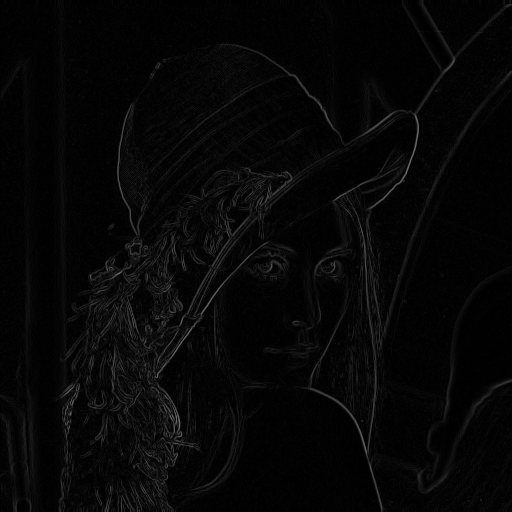

Canny Edge Detection:


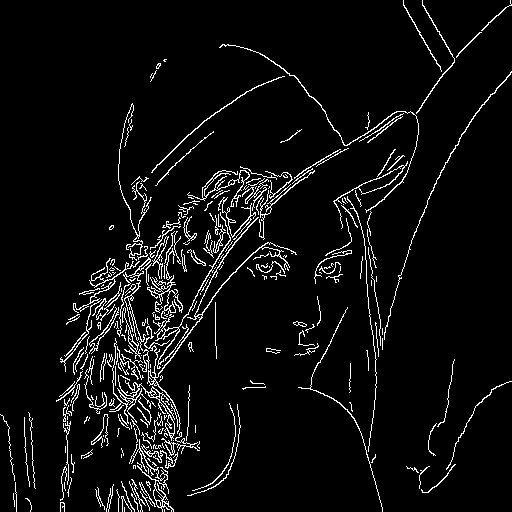

Global Thresholding:


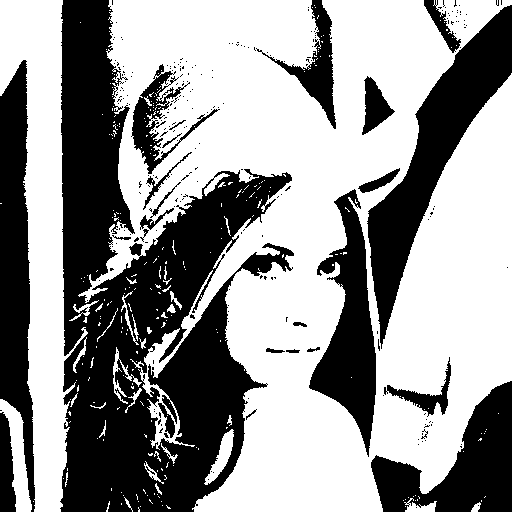

Adaptive Thresholding:


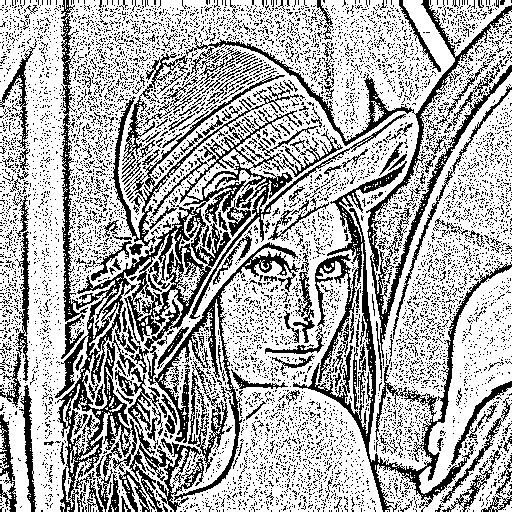

Canny Edge Segmentation:


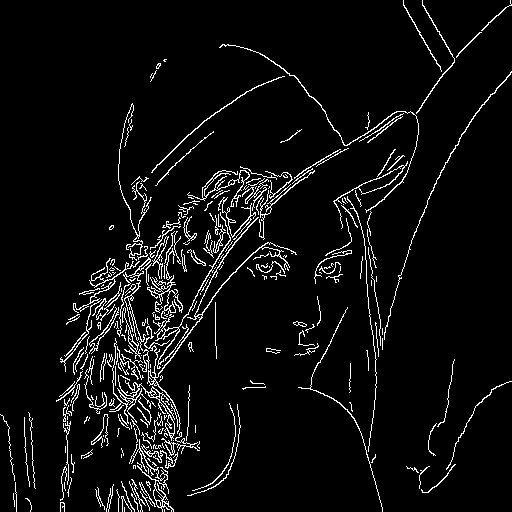

Watershed Segmentation:


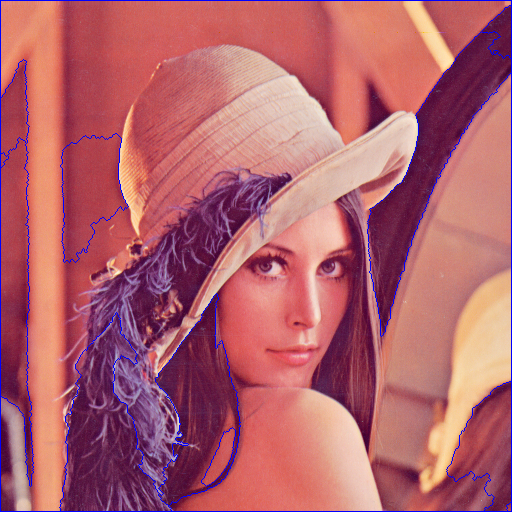

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage.filters import prewitt, roberts

# Load Image
image_path = "/content/drive/MyDrive/Lena_Image.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display Original Image
print("Original Image:")
cv2_imshow(img)

#EDGE DETECTION

# 1. Sobel Operator (X and Y)
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.bitwise_or(sobel_x, sobel_y)

print("Sobel Edge Detection:")
cv2_imshow(sobel_combined)

# 2. Prewitt Operator
prewitt_x = prewitt(img)
prewitt_y = prewitt(img.T).T
prewitt_combined = np.maximum(prewitt_x, prewitt_y)

print("Prewitt Edge Detection:")
cv2_imshow((prewitt_combined * 255).astype(np.uint8))

# 3. Roberts Cross Operator
roberts_cross = roberts(img)

print("Roberts Cross Edge Detection:")
cv2_imshow((roberts_cross * 255).astype(np.uint8))

# 4. Canny Edge Detector
canny_edges = cv2.Canny(img, 100, 200)

print("Canny Edge Detection:")
cv2_imshow(canny_edges)

#IMAGE SEGMENTATION

# 1. Global Thresholding
_, global_thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

print("Global Thresholding:")
cv2_imshow(global_thresh)

# 2. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

print("Adaptive Thresholding:")
cv2_imshow(adaptive_thresh)

# 3. Edge Detection for Segmentation (Canny)
print("Canny Edge Segmentation:")
cv2_imshow(canny_edges)

# 4. Region-Based Segmentation (Watershed Algorithm)
# Convert image to color for watershed
img_color = cv2.imread(image_path)
gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal (Morphological Transformations)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add 1 to all labels so that sure background is not 0
markers = markers + 1

# Mark the unknown region with 0
markers[unknown == 255] = 0

# Apply Watershed
cv2.watershed(img_color, markers)
img_color[markers == -1] = [255, 0, 0]  # Mark boundaries in red

print("Watershed Segmentation:")
cv2_imshow(img_color)
